# Christie Woodside HW8 Problem Set 2 - Association Rules

In [18]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

census_data = pd.read_csv('rgcsdi-2015-2019-censustract.csv')
print(census_data.columns)
census_data.head()

/Users/christiewoodside/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['CENSUSTRACT_FIPS', 'CensusTract_population', 'SDI_score', 'PovertyLT100_FPL_score', 'Single_Parent_Fam_score', 'Education_LT12years_score', 'HHNo_Vehicle_score', 'HHRenter_Occupied_score', 'HHCrowding_score', 'Nonemployed_score', 'sdi', 'pct_Poverty_LT100', 'pct_Single_Parent_Fam', 'pct_Education_LT12years', 'pct_NonEmployed', 'pctHH_No_Vehicle', 'pctHH_Renter_Occupied', 'pctHH_Crowding'], dtype='object')


,CENSUSTRACT_FIPS,CensusTract_population,SDI_score,PovertyLT100_FPL_score,Single_Parent_Fam_score,Education_LT12years_score,HHNo_Vehicle_score,HHRenter_Occupied_score,HHCrowding_score,Nonemployed_score,sdi,pct_Poverty_LT100,pct_Single_Parent_Fam,pct_Education_LT12years,pct_NonEmployed,pctHH_No_Vehicle,pctHH_Renter_Occupied,pctHH_Crowding
0,1001020100,1993,52.0,71.0,50.0,64.0,11.0,38.0,1.0,74.0,0.019577,0.166583,0.116402,0.125472,0.454829,0.009873,0.236953,0.000000
1,1001020200,1959,74.0,77.0,26.0,71.0,86.0,61.0,44.0,96.0,0.716664,0.191340,0.071618,0.148254,0.779101,0.142442,0.373547,0.015988
2,1001020300,3507,71.0,73.0,68.0,71.0,50.0,58.0,61.0,44.0,0.594259,0.172512,0.160775,0.149701,0.332575,0.046324,0.353676,0.027941
3,1001020400,3878,22.0,18.0,33.0,44.0,14.0,32.0,27.0,65.0,-0.867549,0.046416,0.085202,0.081583,0.411869,0.012537,0.208955,0.007164
4,1001020500,10596,59.0,67.0,42.0,43.0,49.0,78.0,21.0,31.0,0.211409,0.151626,0.100202,0.079653,0.292953,0.044390,0.516841,0.004684


In [19]:
percentiles = {}
columns = [
    'PovertyLT100_FPL_score',
    'Single_Parent_Fam_score',
    'Education_LT12years_score',
    'HHNo_Vehicle_score',
    'HHRenter_Occupied_score',
    'HHCrowding_score',
    'Nonemployed_score'
]
#checks each column and row is above the quantile
for col in columns:
    percentiles[col] = census_data[col].quantile(0.75)

# Create new columns that flag whether each value exceeds the 75th percentile
for col in columns:
    census_data[f'{col}_Above75'] = census_data[col] > percentiles[col]

print(census_data.head())

   CENSUSTRACT_FIPS  CensusTract_population  SDI_score  PovertyLT100_FPL_score  Single_Parent_Fam_score  Education_LT12years_score  HHNo_Vehicle_score  HHRenter_Occupied_score  HHCrowding_score  Nonemployed_score       sdi  pct_Poverty_LT100  pct_Single_Parent_Fam  pct_Education_LT12years  pct_NonEmployed  pctHH_No_Vehicle  pctHH_Renter_Occupied  pctHH_Crowding  PovertyLT100_FPL_score_Above75  Single_Parent_Fam_score_Above75  Education_LT12years_score_Above75  HHNo_Vehicle_score_Above75  HHRenter_Occupied_score_Above75  HHCrowding_score_Above75  Nonemployed_score_Above75
0        1001020100                    1993       52.0                    71.0                     50.0                       64.0                11.0                     38.0               1.0               74.0  0.019577           0.166583               0.116402                 0.125472         0.454829          0.009873               0.236953        0.000000                           False                           

/Users/christiewoodside/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Frequent Itemset Analysis

In [20]:
#a)
flag_column = [col for col in census_data.columns if '_Above75' in col]
flag_data = census_data[flag_column]

print(flag_data.head(5))

#b)
'''1 is True and 0 is False
"flag whether each value exceeds the 75th percentile"'''
binary = flag_data.astype(int)
print(binary.head())

   PovertyLT100_FPL_score_Above75  Single_Parent_Fam_score_Above75  Education_LT12years_score_Above75  HHNo_Vehicle_score_Above75  HHRenter_Occupied_score_Above75  HHCrowding_score_Above75  Nonemployed_score_Above75
0                           False                            False                              False                       False                            False                     False                      False
1                           False                            False                              False                        True                            False                     False                       True
2                           False                            False                              False                       False                            False                     False                      False
3                           False                            False                              False                       False       

/Users/christiewoodside/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
#c) identifying frequeant items
f_items = apriori(binary, min_support=0.05, use_colnames=True)

print(f_items)

/Users/christiewoodside/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/christiewoodside/opt/anaconda3/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


     support                                                                                                                                                           itemsets
0   0.237625                                                                                                                                   (PovertyLT100_FPL_score_Above75)
1   0.247498                                                                                                                                  (Single_Parent_Fam_score_Above75)
2   0.240405                                                                                                                                (Education_LT12years_score_Above75)
3   0.238228                                                                                                                                       (HHNo_Vehicle_score_Above75)
4   0.247498                                                                                                            

## Association Rule Mining

In [22]:
#also my the metric 'lift'
a_rules = association_rules(f_items, metric= 'lift', min_threshold=0.6)
print(a_rules)
"""the antecedent is the "if" part and the consequent is the "then" part"""

                             antecedents                                                                                                                     consequents  antecedent support  consequent support   support  confidence      lift  leverage  conviction  zhangs_metric
0       (PovertyLT100_FPL_score_Above75)                                                                                               (Single_Parent_Fam_score_Above75)            0.237625            0.247498  0.151935    0.639391  2.583425  0.093124    2.086757       0.803957
1      (Single_Parent_Fam_score_Above75)                                                                                                (PovertyLT100_FPL_score_Above75)            0.247498            0.237625  0.151935    0.613887  2.583425  0.093124    1.974484       0.814505
2    (Education_LT12years_score_Above75)                                                                                                (PovertyLT100_FPL_score_Above7

/Users/christiewoodside/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'the antecedent is the "if" part and the consequent is the "then" part'

In [23]:
a_rules_by_lift = a_rules.sort_values(by="lift", ascending=False)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000) #increasing the display width
pd.set_option('display.max_colwidth', None)

print("Top 25 Rules by Lift Metric:\n", a_rules_by_lift.head(25))

''' "Higher lift values indicate stronger associations between the antecedents and consequents."

the a values with 'lift' greater than 1 'that the occurrence of the antecedent increases the likelihood of 
the consequent occurring, indicating a potentially valuable association.'  '''


Top 25 Rules by Lift Metric:
                                                                                                antecedents                                                                                            consequents  antecedent support  consequent support   support  confidence      lift  leverage  conviction  zhangs_metric
586          (Nonemployed_score_Above75, HHRenter_Occupied_score_Above75, Single_Parent_Fam_score_Above75)                                           (PovertyLT100_FPL_score_Above75, HHNo_Vehicle_score_Above75)            0.064890            0.139270  0.054087    0.833509  5.984860  0.045049    5.169837       0.890710
591                                           (PovertyLT100_FPL_score_Above75, HHNo_Vehicle_score_Above75)          (Nonemployed_score_Above75, HHRenter_Occupied_score_Above75, Single_Parent_Fam_score_Above75)            0.139270            0.064890  0.054087    0.388359  5.984860  0.045049    1.528854       0.967680
593          

/Users/christiewoodside/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


' "Higher lift values indicate stronger associations between the antecedents and consequents."\n\nthe a values with \'lift\' greater than 1 \'that the occurrence of the antecedent increases the likelihood of \nthe consequent occurring, indicating a potentially valuable association.\'  '

## Results Analysis

In [24]:
#to be used as an example for the results analysis
print(a_rules_by_lift.head(1), '\n\n')

                                                                                       antecedents                                                   consequents  antecedent support  consequent support   support  confidence     lift  leverage  conviction  zhangs_metric
586  (Nonemployed_score_Above75, HHRenter_Occupied_score_Above75, Single_Parent_Fam_score_Above75)  (PovertyLT100_FPL_score_Above75, HHNo_Vehicle_score_Above75)             0.06489             0.13927  0.054087    0.833509  5.98486  0.045049    5.169837        0.89071 




/Users/christiewoodside/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


So the antecedant is that the conditions need to be true in order for the rule to apply. The consequent will be likely to happen if the antecedent is true. 

So given the printout above, (Nonemployed_score_Above75, HHRenter_Occupied_score_Above75, Single_Parent_Fam_score_Above75) exceeds the 75th percentile then the consequent, (HHNo_Vehicle_score_Above75, PovertyLT100_FPL_score_Above75), is likely to happen. So the condition is true then there is an association with the consequent exceeding the 75th percentile. This example is for the highest lift value. 

The top rules can have significance by explainiing patterns which can be used for decision-making or in the case of this data policy making. This can help better understand which rules are highly associated to another allowing for further research.

For example, the fourth highest lift value has (Nonemployed_score_Above75, HHRenter_Occupied_score_Above75) -> (HHNo_Vehicle_score_Above75, Single_Parent_Fam_score_Above75, PovertyLT100_FPL_score_Above75). This shows that if someone who was unemployed and is not renting is true then they most likely do not have a vehicle, are a single family, and below the 100% federal poverty line, particularly exceeding the 75th percentile in poverty. This can allow for us to understand the relaitonship between these rules and if any decision can be made to fix this. 

Another example, for the secodn highest lift value is (HHNo_Vehicle_score_Above75, PovertyLT100_FPL_score_Above75) -> (Nonemployed_score_Above75, HHRenter_Occupied_score_Above75, Single_Parent_Fam_score_Above75). Thsi says that if they do not have a vehicle and are below the 100% federal poverty line, , particularly exceeding the 75th percentile in poverty, then they most likely are unemployed, do not rent, and are from a single parent family. This is very similar to the one above indicating that these associations are common amongst these rules. This data can allow for researchers to push for policies to help social welfare or other federal aid programs to help them.

## Optional: Visualization Task

/Users/christiewoodside/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


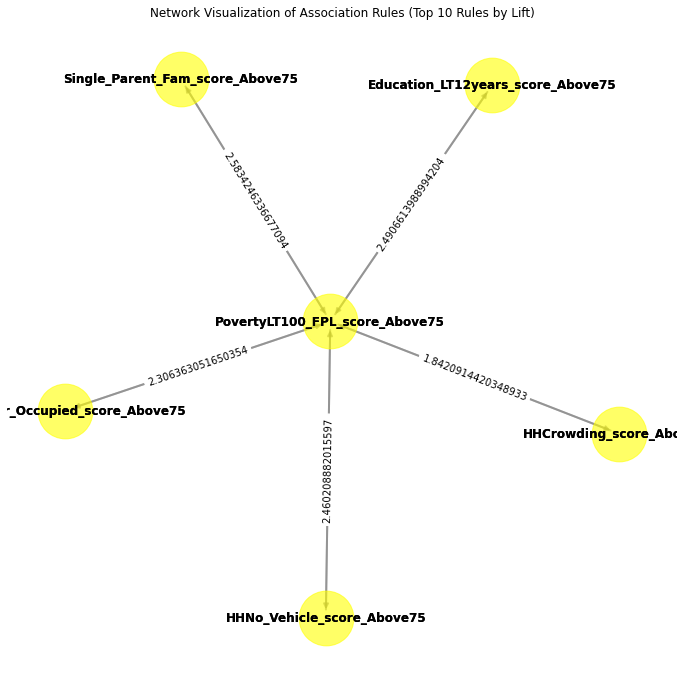

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


# top rules by metric lift
#top_rules = a_rules_by_lift.head(25)
top_rules = a_rules.head(10)

# Initialize a directed graph
G = nx.DiGraph()

# Add nodes and edges based on the rules
for _, rule in top_rules.iterrows():
    antecedent = list(rule['antecedents'])[0]  
    consequent = list(rule['consequents'])[0]  
    lift = rule['lift']
    
    # Add the edge with lift as the weight
    G.add_edge(antecedent, consequent, weight=lift)


plt.figure(figsize=(12, 12))
plt.gcf().set_facecolor('white')  # Setting background to white so I can actually see it

# Positions for all nodes using spring layout (force-directed graph)
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Draw the network graph
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='yellow', alpha=0.6)
nx.draw_networkx_edges(G, pos, width=2, alpha=0.6, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Draw edge labels (lifting values or other metrics)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Create more descriptive labels for nodes
node_labels = {node: node.split('=')[0] for node in G.nodes} 
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_weight='bold')


plt.title('Network Visualization of Association Rules (Top 10 Rules by Lift)')
plt.axis('off')
plt.show()


Poverty score above 75 appears to have the most associations, which is why it is centered at the middle. The back and forth arrow between No Vehicle and Poverty score can say, if poverty score is above 75 then no vehicle in the 75th and above percentile, and vice versa. The lift score is 2.5 indicating that people with poverty scores abouve the 75th percentile are significanly more likely to not have a car. If the poverty score is above the 75th percentile, then crowding is above the 75th percentile. Here, the lift score is 1.8 saying if the poverty score is above the 75th percentile then there is a moderate/medium association to dealing with overcrowding in the home. This graph helps us visualize the relationships between the antecedents and the consequents of the data and see the lift metric values directly. 